In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime
%matplotlib notebook


#adding dependencies for API pulls
import requests
from pprint import pprint
from config import access_key

In [2]:
# Reference files
stocks_10yr_df = pd.read_csv("Resources/stocks_10yr_df.csv")
stocks_2020_df = pd.read_csv("Resources/stocks_2020_df.csv")
reduced_data = pd.read_csv("Resources/reduced_data.csv")
month_data_df = pd.read_csv("Resources/month_data_df.csv")
currencyDF2020 = pd.read_csv("Resources/currencyDF2020.csv")
currencydf = pd.read_csv("Resources/currencydf.csv")

In [35]:
# Create new data frame for deaths by day
origin_df = pd.read_csv("Resources/use_this_covid_data.csv")
#convert date column to datetime
origin_df["date"] = pd.to_datetime(origin_df["date"])
country_data = origin_df.loc[(origin_df["location"] == "United States") |
                           (origin_df["location"] == "Canada") | 
                           (origin_df["location"] == "China") | 
                           (origin_df["location"] == "Brazil") | 
                           (origin_df["location"] == "Germany") | 
                           (origin_df["location"] == "India") | 
                           (origin_df["location"] == "Japan") | 
                           (origin_df["location"] == "Mexico")]

In [36]:
country_data = country_data.loc[:, ["location", "date", "new_cases", "new_deaths"]]


In [39]:
usa_covid = country_data.loc[(country_data['location'] == 'United States')]
usa_covid

,location,date,new_cases,new_deaths
80353,United States,2020-01-22,NaN,NaN
80354,United States,2020-01-23,0.0,NaN
80355,United States,2020-01-24,1.0,NaN
80356,United States,2020-01-25,0.0,NaN
80357,United States,2020-01-26,3.0,NaN
...,...,...,...,...
80811,United States,2021-04-24,53363.0,724.0
80812,United States,2021-04-25,32065.0,279.0
80813,United States,2021-04-26,47691.0,474.0
80814,United States,2021-04-27,50856.0,641.0


In [31]:
# Define variables
usa_stock_list = stocks_2020_df['USA Down Jones (%)']    

# Create labels for plot
title_usa = "USA Down Jones Change (%) vs. Covid Deaths Linear Regression"
xlabel_usa = "Covid Deaths"
ylabel_usa = "Dow Jones"

# Plot the location of the line equation
loc_usa = (5,25)

# Create a function for plotting the scatter chart and linear regression
def linear_regress_stocks(stocks, deaths, title, xlabel, ylabel, manno_loc):
    
    #calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(deaths, stocks)
    regress_values = deaths * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Choose colors
    colors = np.random.rand(N)
    
    #Plot the data
    plt.scatter(deaths, stocks, c=colors, alpha=.75)

   #Plot the linear regression
    plt.plot(deaths, regress_values, "r-")
    plt.annotate(line_eq, anno_loc, color='red')
    print(f"The r-value is: {rvalue**2}")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.xlabel(ylabel)
    
    return plt.show()

linear_regress_stocks(usa_stock_list, usa_covid_death, title_usa, xlabel_usa, ylabel_usa, loc_n_temp)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

<IPython.core.display.Javascript object>


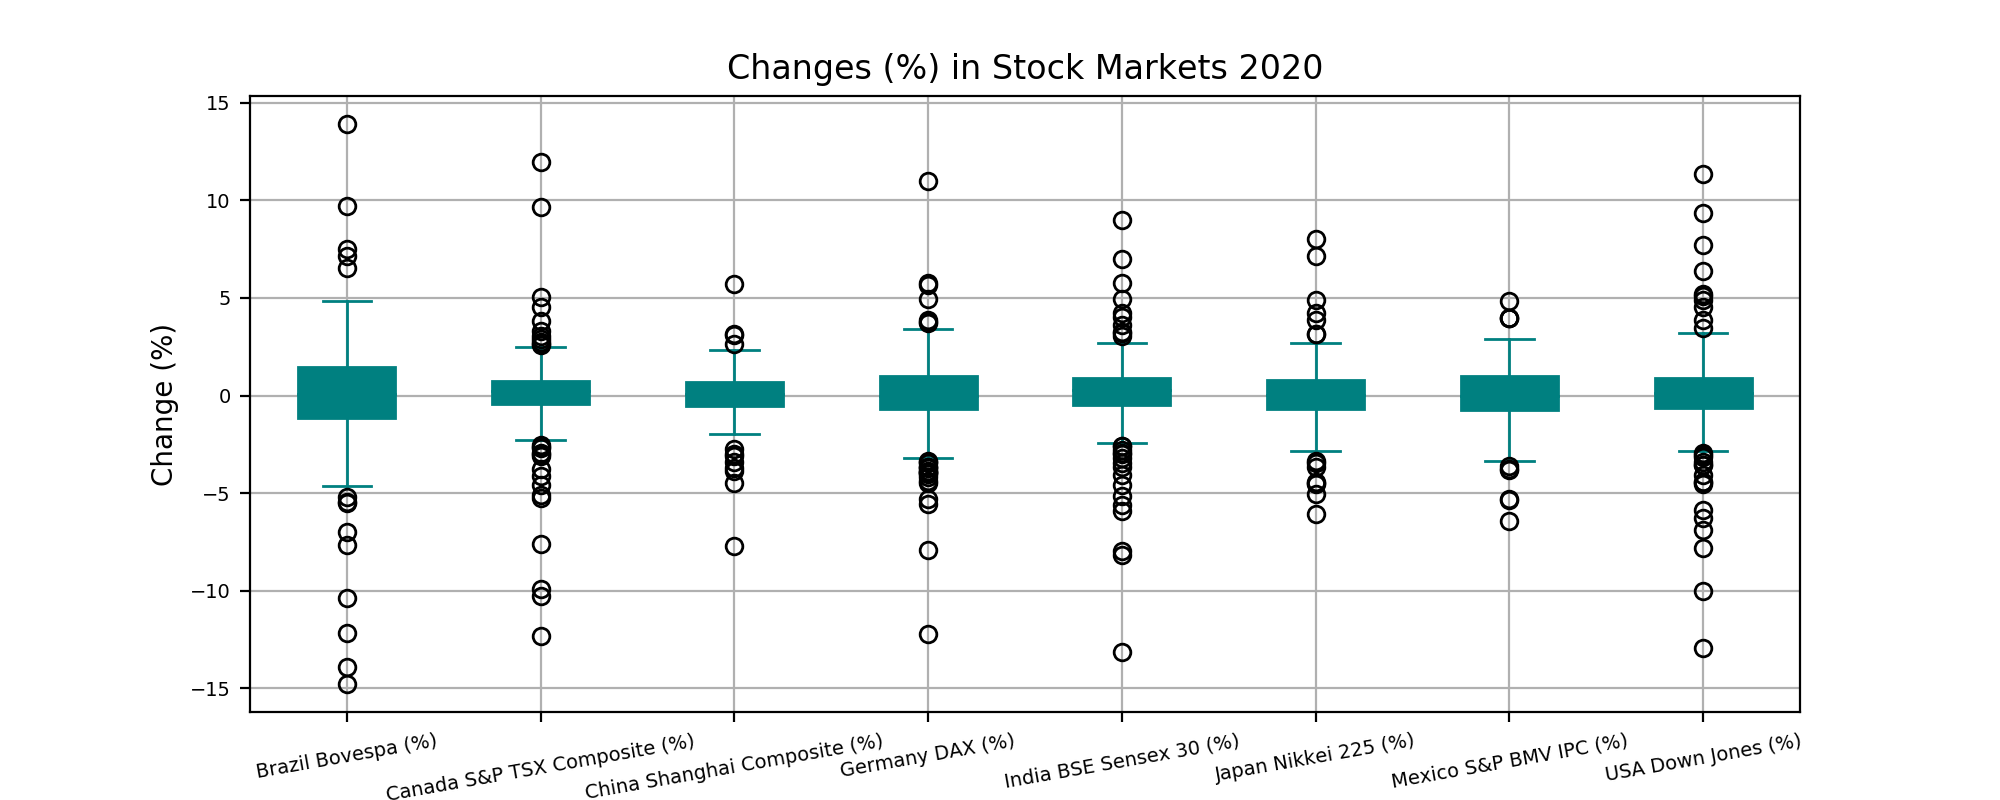

Text(0.5, 0, 'Countries')

In [17]:
# Create a boxplot to compare
stocks_2020_df.boxplot(column=['Brazil Bovespa (%)', 'Canada S&P TSX Composite (%)', 'China Shanghai Composite (%)', \
                                 'Germany DAX (%)', 'India BSE Sensex 30 (%)', 'Japan Nikkei 225 (%)', \
                                 'Mexico S&P BMV IPC (%)', 'USA Down Jones (%)'], \
                                 figsize=(10, 4), rot=10, fontsize=7,\
                                 patch_artist=True, color='teal')
plt.title('Changes (%) in Stock Markets 2020')
plt.ylabel('Change (%)')
plt.xlabel('Countries')

In [10]:
# Create groups
group1 = stocks_2020_df["Brazil Bovespa (%)"].dropna()
group2 = stocks_2020_df["Canada S&P TSX Composite (%)"].dropna()
group3 = stocks_2020_df["China Shanghai Composite (%)"].dropna()
group4 = stocks_2020_df["Germany DAX (%)"].dropna()
group5 = stocks_2020_df["India BSE Sensex 30 (%)"].dropna()
group6 = stocks_2020_df["Japan Nikkei 225 (%)"].dropna()
group7 = stocks_2020_df["Mexico S&P BMV IPC (%)"].dropna()
group8 = stocks_2020_df["USA Down Jones (%)"].dropna()

In [11]:
# Run ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

# The pvalue indicates they are very similar data sets

F_onewayResult(statistic=0.028291061625711354, pvalue=0.9999755781591606)